In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from perceptron import Perceptron

In [2]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train_data.replace(['female', 'male'], [0, 1], inplace=True)
train_data.fillna(0, inplace=True)

In [4]:
x_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_train = train_data[['Survived']].values

In [5]:
early_stop = [keras.callbacks.EarlyStopping(monitor="accuracy",
                            patience=100, restore_best_weights=True)]

In [6]:
model = keras.models.Sequential([
    keras.layers.Dense(6, activation="sigmoid"),
    keras.layers.Dense(101, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

In [7]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [8]:
outputs = model.fit(x_train, y_train,
                    epochs=350,
                    callbacks=early_stop)

Epoch 1/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5868 - loss: 0.6533
Epoch 2/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.6665 - loss: 0.6083
Epoch 3/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.6778 - loss: 0.5616
Epoch 4/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.6697 - loss: 0.5944
Epoch 5/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.6965 - loss: 0.5429
Epoch 6/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.7119 - loss: 0.5698
Epoch 7/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7714 - loss: 0.4978
Epoch 8/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.7650 - loss: 0.5136
Epoch 9/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.7739 - loss: 0.4924
Epoch 10/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.7633 - loss: 0.4941
Epoch 11/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7993 - loss: 0.4703
Epoch 12/350
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 

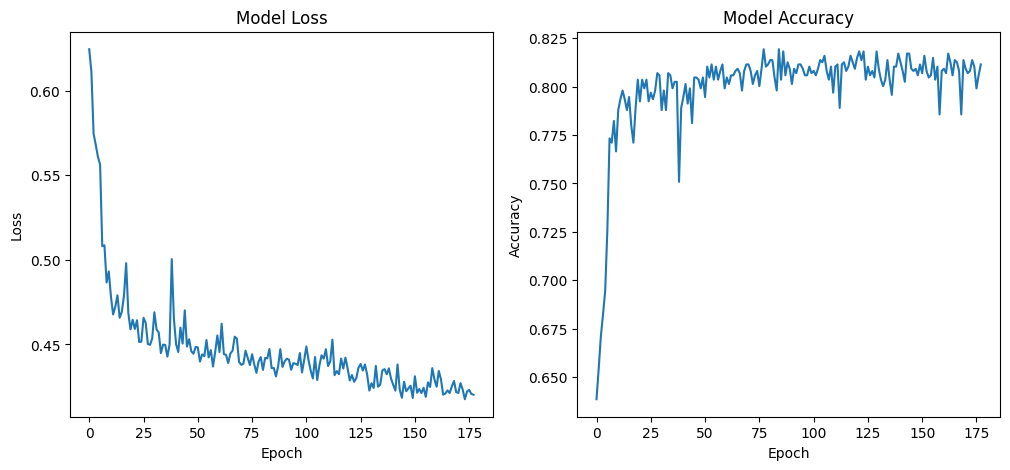

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(outputs.history['loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(outputs.history['accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

In [10]:
test_data = pd.read_csv("input/test.csv")

In [22]:
test_data.replace(['female', 'male'], [0, 1], inplace=True)
test_data.fillna(0, inplace=True)

In [12]:
test_gender_submission = pd.read_csv("input/gender_submission.csv")
test_data['Survived'] = test_gender_submission['Survived']

In [13]:
x_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
y_test = test_data['Survived'].values

In [14]:
model.evaluate(x_test, y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9640 - loss: 0.2510


[0.24592192471027374, 0.9736841917037964]

In [15]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [26]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.97
Precision: 1.00
Recall: 0.93


In [17]:
jack_data = {"Pclass": 3, "Sex": 1, "Age": 23, "SibSp": 0, "Parch": 0, "Fare": 5.0}
rose_data = {"Pclass": 1, "Sex": 0, "Age": 20, "SibSp": 1, "Parch": 2, "Fare": 100.0}

jack_df = pd.DataFrame([jack_data])
rose_df = pd.DataFrame([rose_data])

jack_prediction = model.predict(jack_df)
rose_prediction = model.predict(rose_df)

print(f"Jack Prediction: {np.argmax(jack_prediction[0])}")
print(f"Rose Prediction: {np.argmax(rose_prediction[0])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Jack Prediction: 0
Rose Prediction: 1


In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train.ravel())

knn_predictions = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.68


In [ ]:
perceptron = Perceptron(lr_w=0.001, lr_b=0.001, epochs=350)
perceptron.fit(x_train, y_train)

In [25]:
perceptron_accuracy = perceptron.calculate_accuracy(x_test, y_test, metric="sigmoid")

print(f"Perceptron Accuracy: {perceptron_accuracy:.2f}")

Perceptron Accuracy: 0.64
